In [1]:
import pylab, math, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

**Stationary entropy**

Stationary gaze entropy estimates uncertainty in overall spatial dispersion of fixations across a visual scene.

State Spaces = 5.0 * 5.0 = 25.0 
Maximum H = 4.643856189774724 
Observed H = 3.0253029419294886 
Normalised by Hmax = 0.6514635290797511


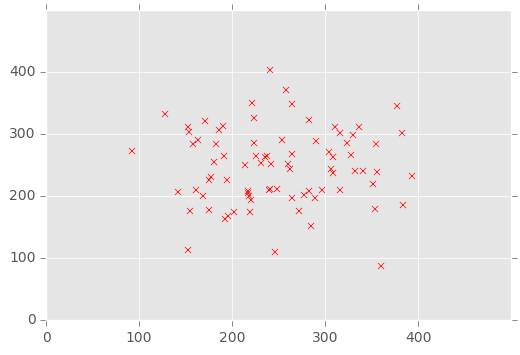

In [5]:
# generate simulation of fixations with pseudo-gaussian distribution for simplicity and calculate entropy
# to see how it varies with number of fixations, their distribution and number of discrete state spaces generated

random.seed(99999) #set seed for reproducibility

N = 80 #observed number of fixations (adjust to increase/reduce number of fixations)
minn = 500 #limit for gaussian - just to make ploting easier
maxn = 0 #limit for gaussian
mean = minn/2
sd = 65

#pseudo-gaussian distribution due to the minn maxn parameters set
x = [min(minn, max(maxn, random.gauss(mean, sd))) for i in range(N)]
y = [min(minn, max(maxn, random.gauss(mean, sd))) for i in range(N)]
xy = np.vstack((x,y))
s = minn #state spaces (maximum coordinate value)
sby = 100 #interval for state space division(adjust to increase/reduce number of state spaces generated)

#create dataframe with fixation coordinates and state spaces (i.e. x_range)
xydf=pd.DataFrame(xy.reshape(N,2), index = np.arange(N), columns=('x','y'))
xydf['x_range'] = pd.cut(xydf.x, np.arange(0, s, sby), right=False)
xydf['y_range'] = pd.cut(xydf.y, np.arange(0, s, sby), right=False)

#plot the coordinates and set grid limit according to the state spaces generated
plt.scatter(xydf.x, xydf.y, marker='x', c='red')
plt.axis([0, s, 0, s])
plt.xticks((np.arange(0, s, sby)))
plt.yticks((np.arange(0, s, sby)))

#generate probablity distributions for each state space to calculate entropy
xydf=xydf.groupby(['x_range','y_range']).size().reset_index().rename(columns={0:'count'})
xydf['p']=xydf['count']/xydf['count'].sum()

#multiply each p by its log
p_by_log = list()
for i in np.array(xydf['p']):
    p_by_log.append(math.log2(i)*i)
xydf['p*log(p)']= p_by_log

#list the number of state spaces, maximum entropy, observed entropy and normalised entropy
#NOTE: coordinates outside the defined state spaces are not included in the entropy calculation
print('State Spaces =',s/sby, '*', s/sby, '=', s/sby*s/sby, '\n'
    'Maximum H =' ,math.log2(s/sby*s/sby), '\n'
    'Observed H =' ,abs(xydf['p*log(p)'].sum()), '\n'
    'Normalised by Hmax =' ,abs(xydf['p*log(p)'].sum()/math.log2(s/sby*s/sby)))